# Importing Library and reading dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn .preprocessing import PowerTransformer

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

# Getting some insight

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Train Test Split

In [8]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(824, 8)

# Without any Transformation

## Applying regression without any trasformation

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

r2_score(y_test,y_pred)

0.6275531792314852

In [63]:
lr=LinearRegression()
print(np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10)))

0.27820729160873797


## Plotting

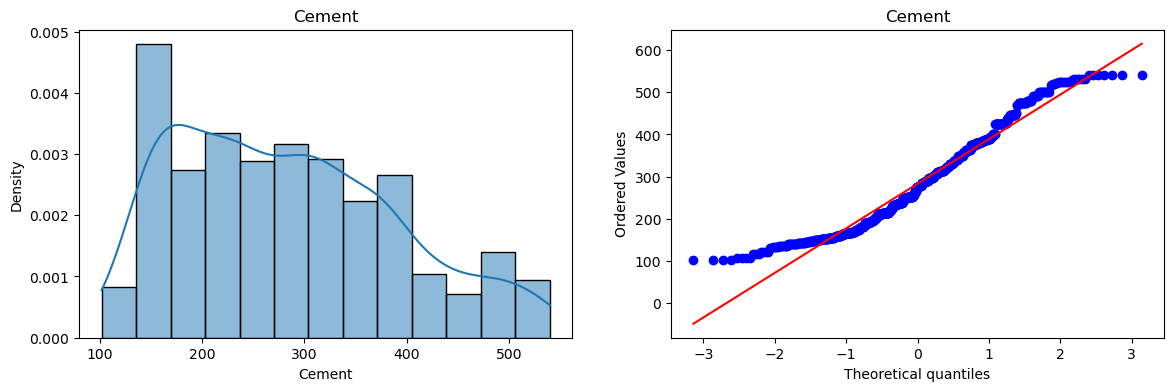

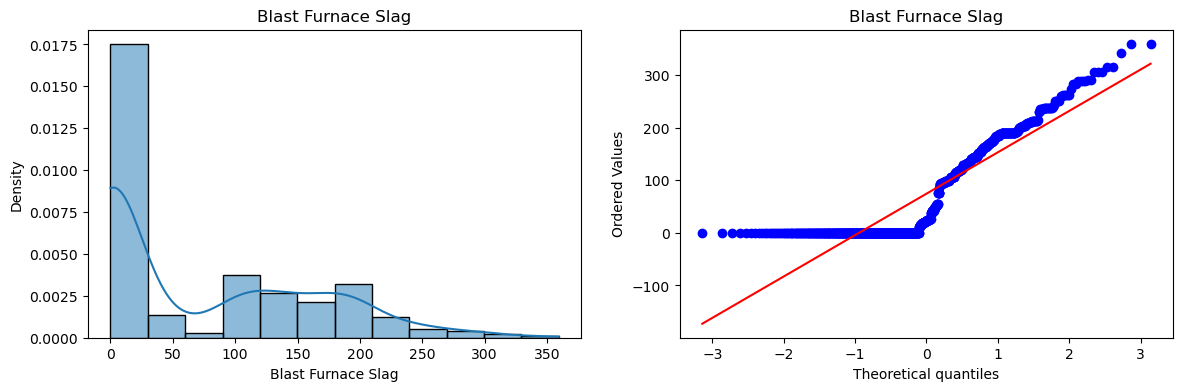

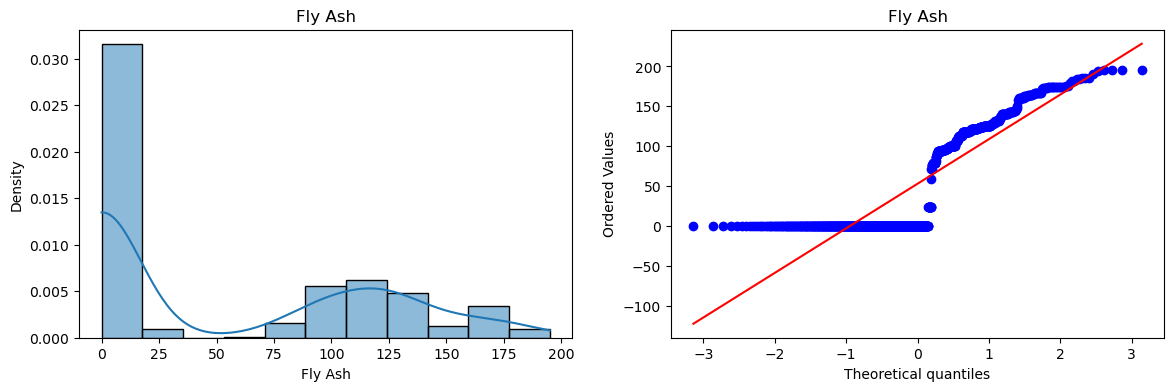

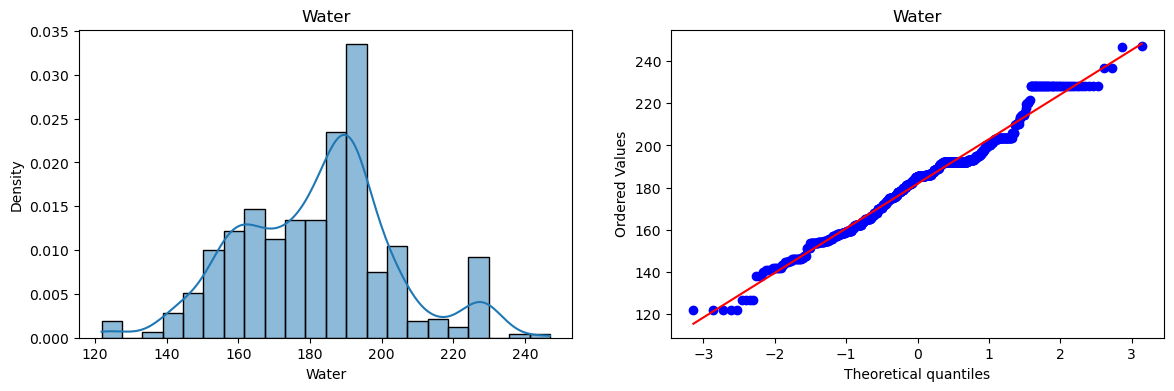

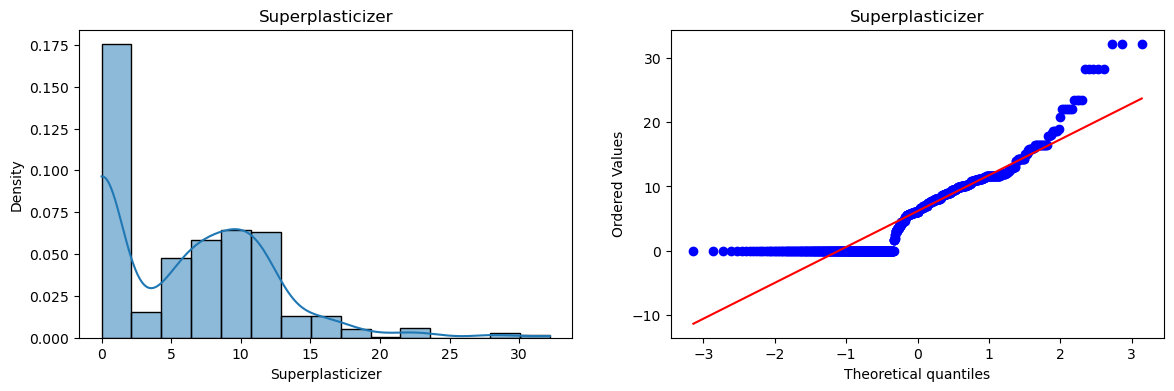

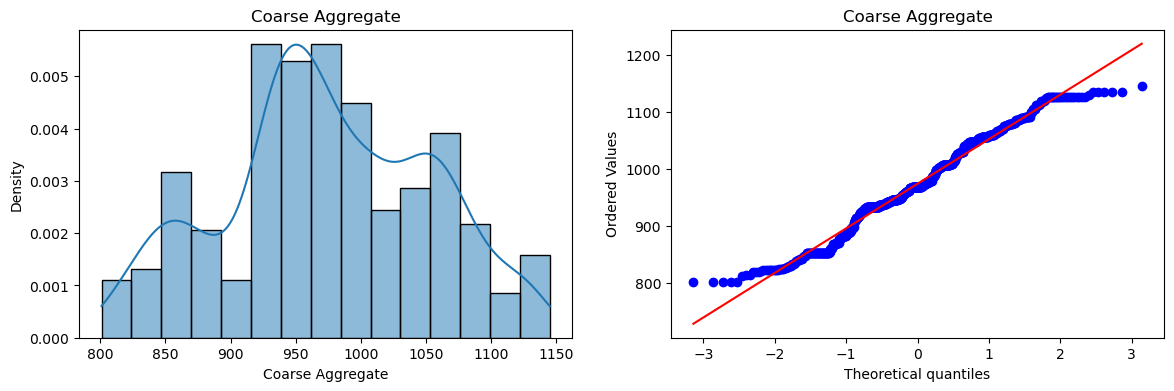

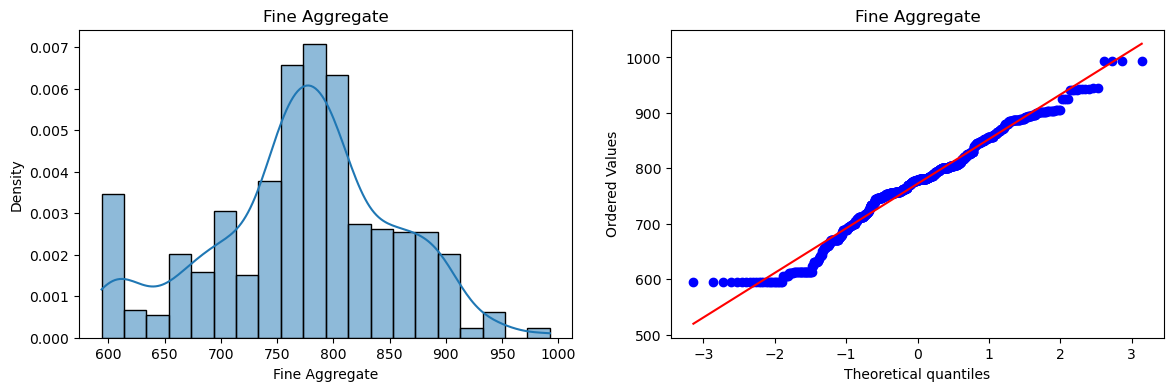

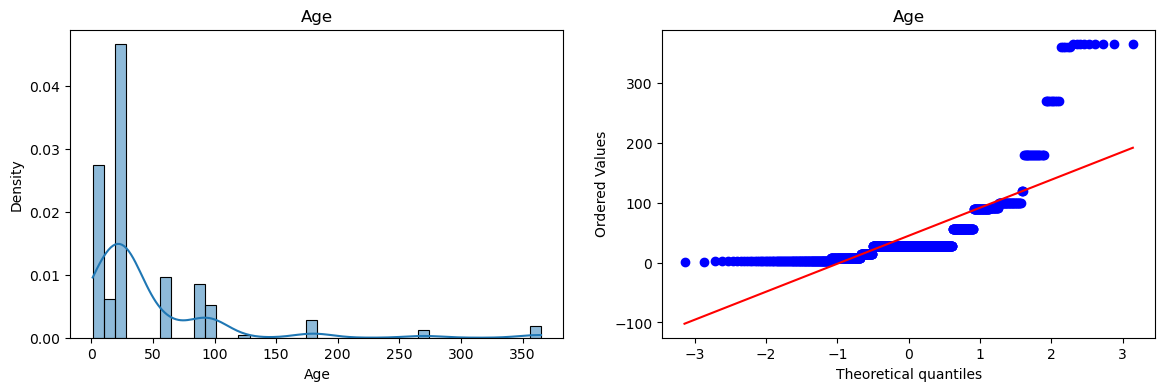

In [50]:
for col in x_train.columns:

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.histplot(x_train[col],kde=True,stat='density')
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],plot=plt,dist='norm')
    plt.title(col)

# Applying Box-Cox Transformation

In [92]:
pt=PowerTransformer(method='box-cox')

x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.transform(x_test+0.000001)

In [93]:
pd.DataFrame({
    'Col':x_train.columns,
    'Box-Cox Lambda':pt.lambdas_
})

,Col,Box-Cox Lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


## Applying regression 

In [94]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred1=lr.predict(x_test_transformed)

r2_score(y_pred1,y_test)

0.7618995274364543

## Cross Value Score

In [95]:
pt=PowerTransformer(method='box-cox')
lr=LinearRegression()

x_transformed1=pt.fit_transform(x+0.000001)

print(np.mean(cross_val_score(lr,x_transformed1,y,scoring='r2',cv=10)))

0.6466764751014923


## Plotting

In [96]:
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)

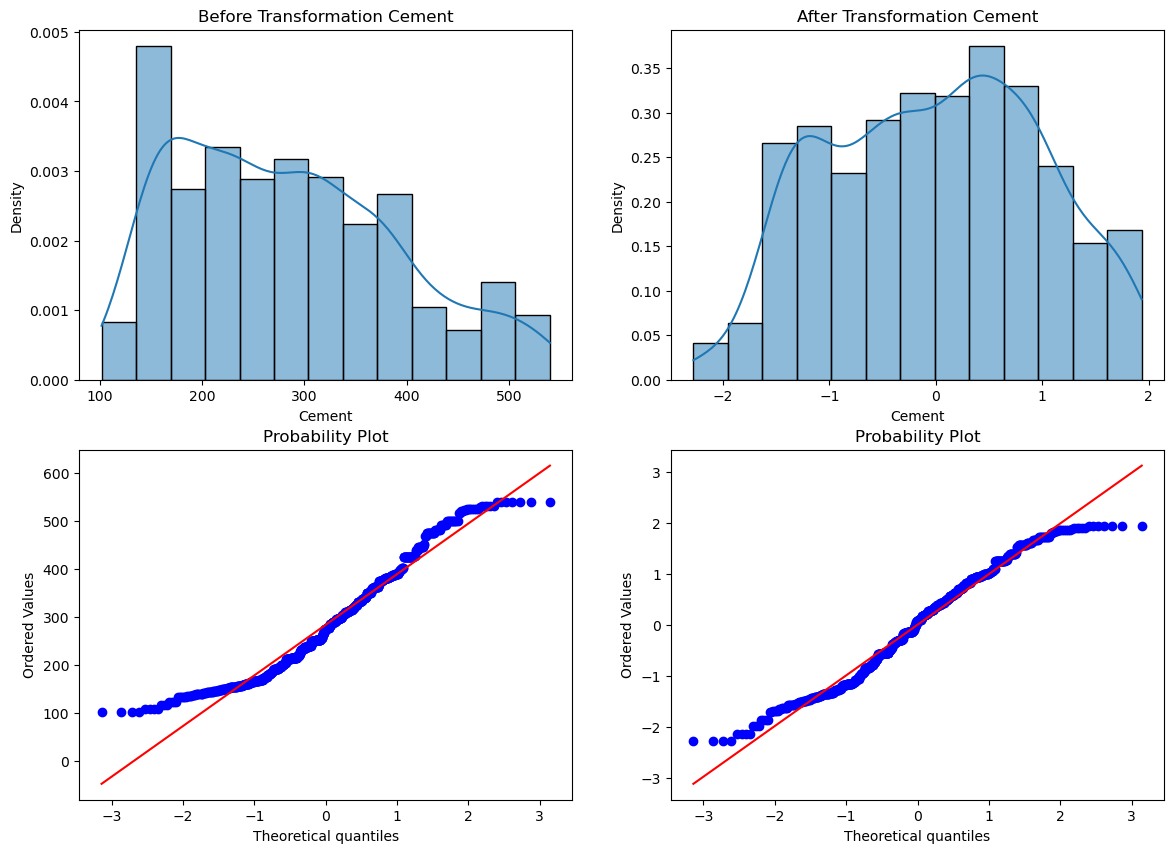

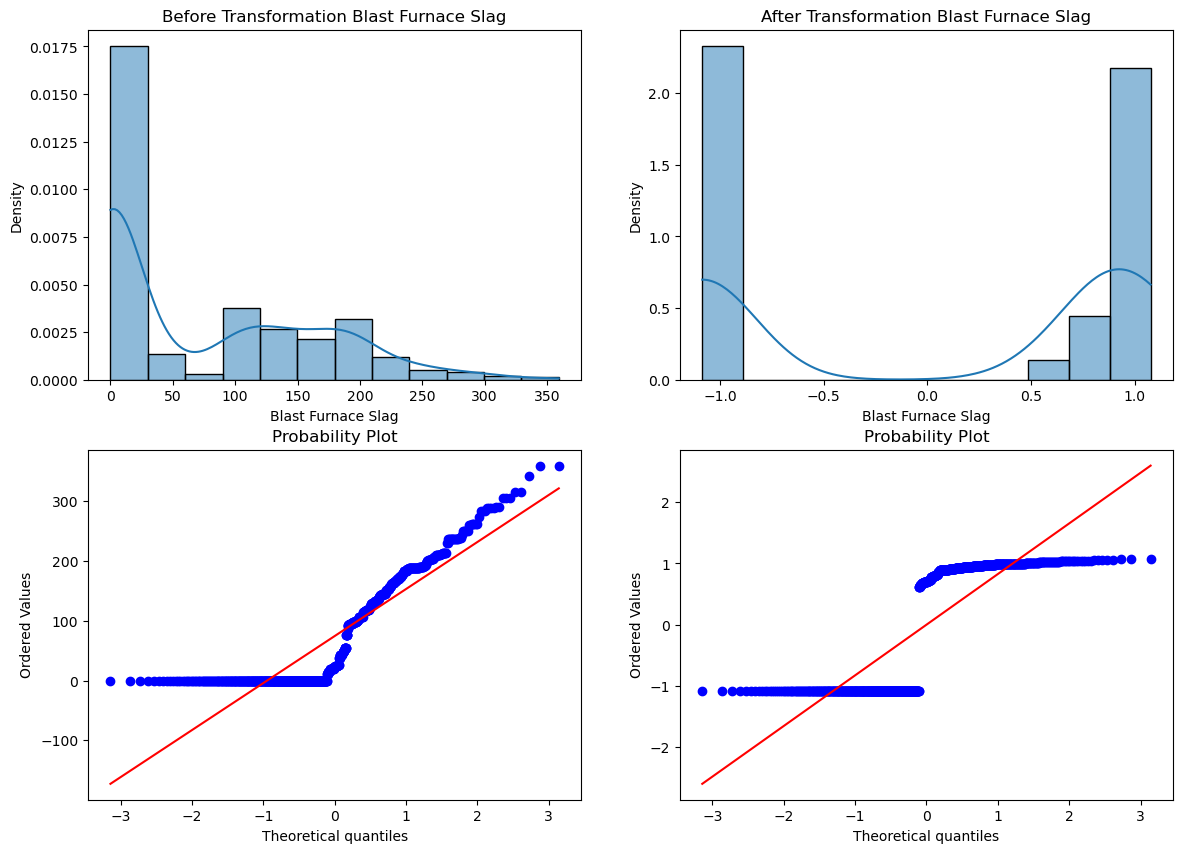

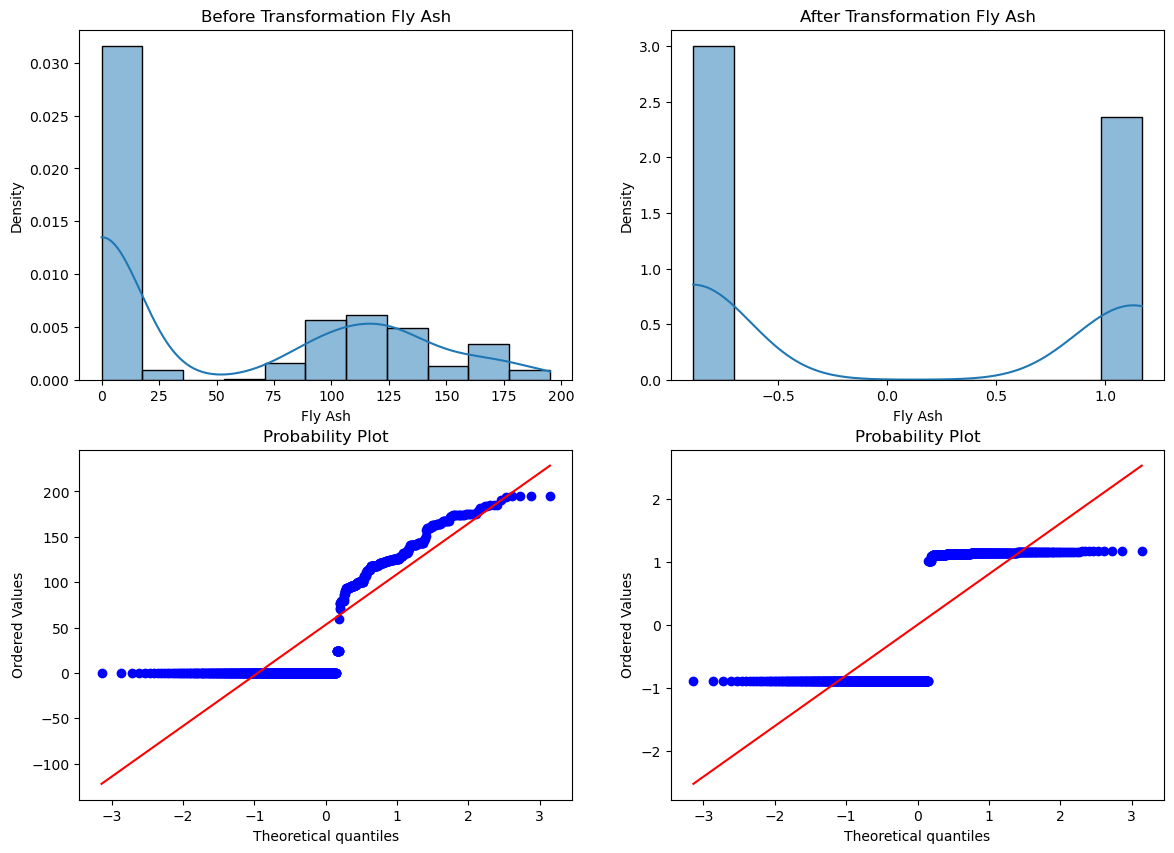

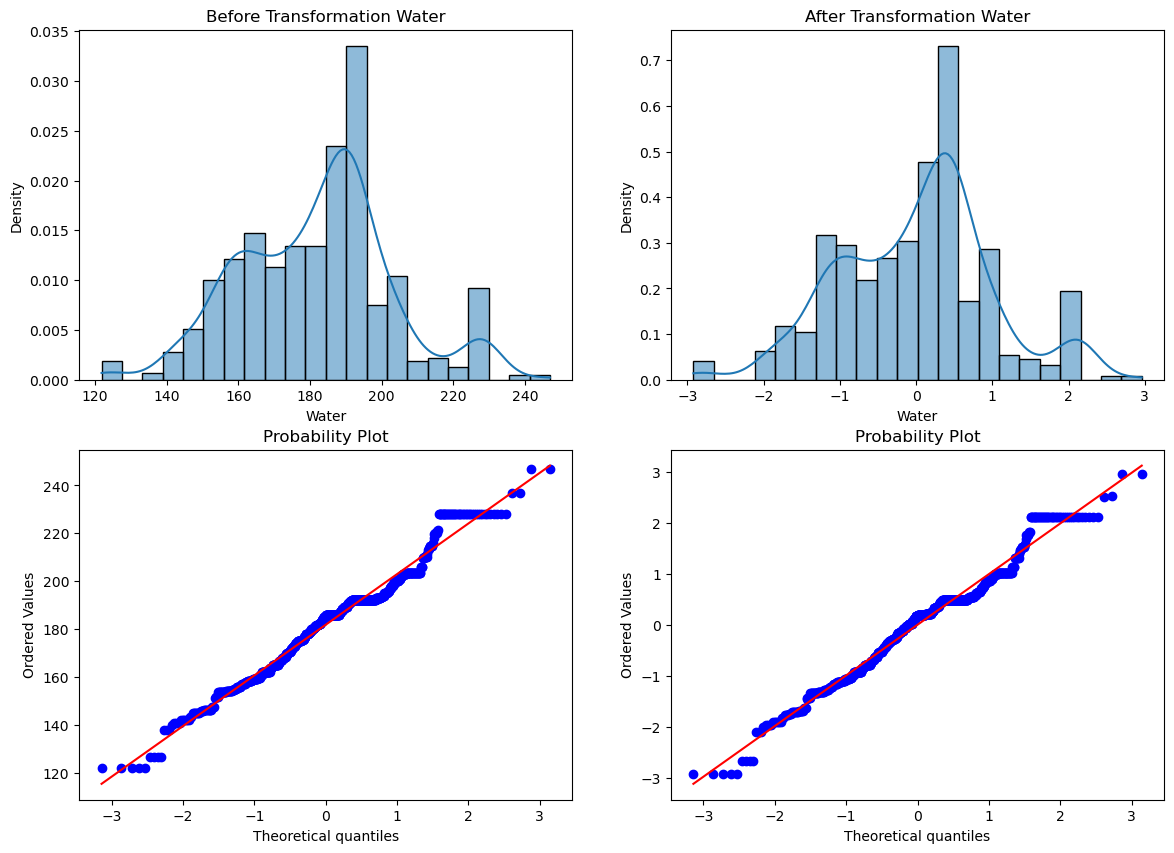

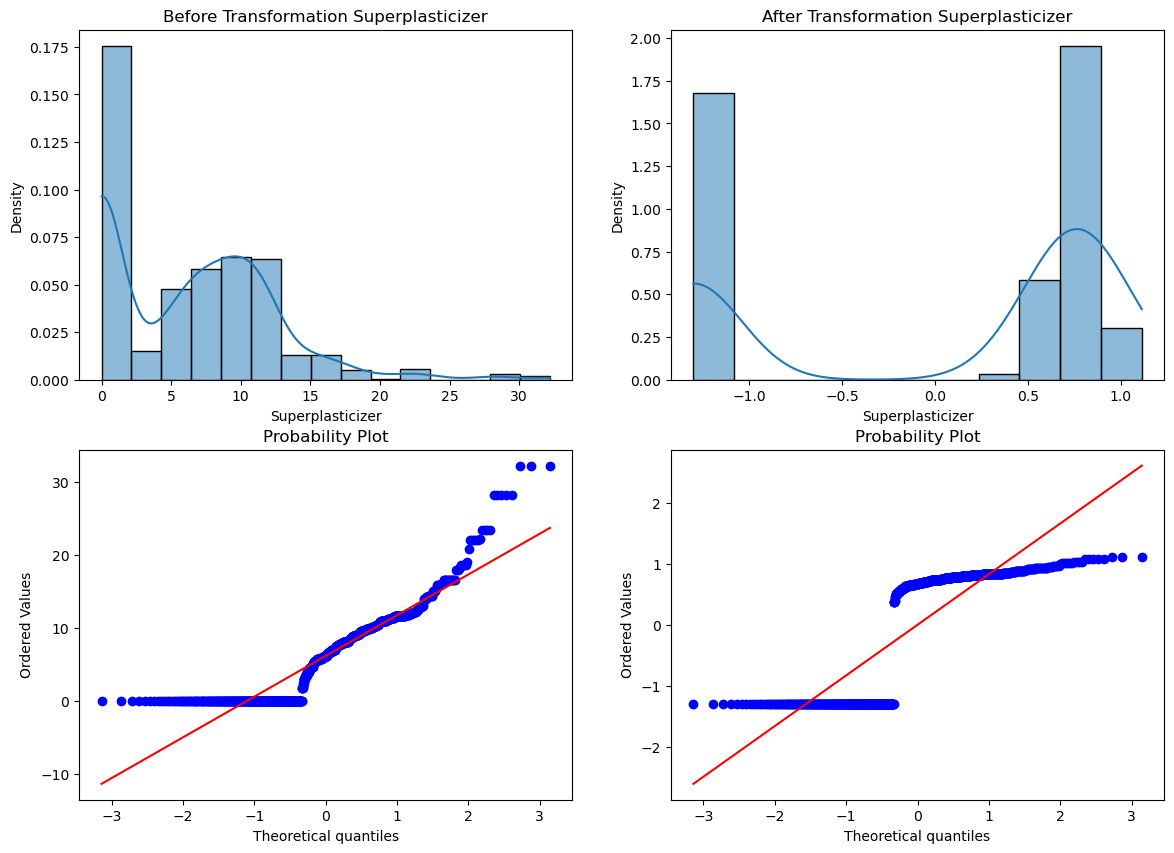

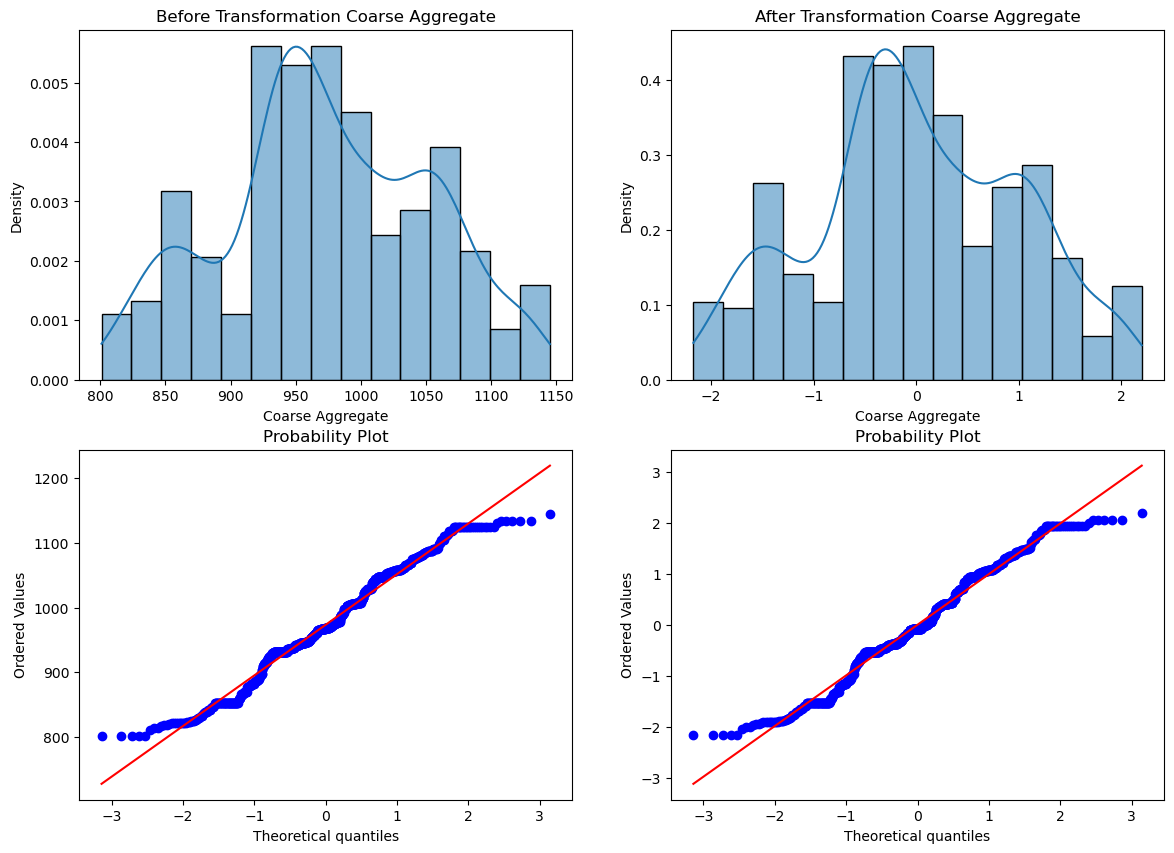

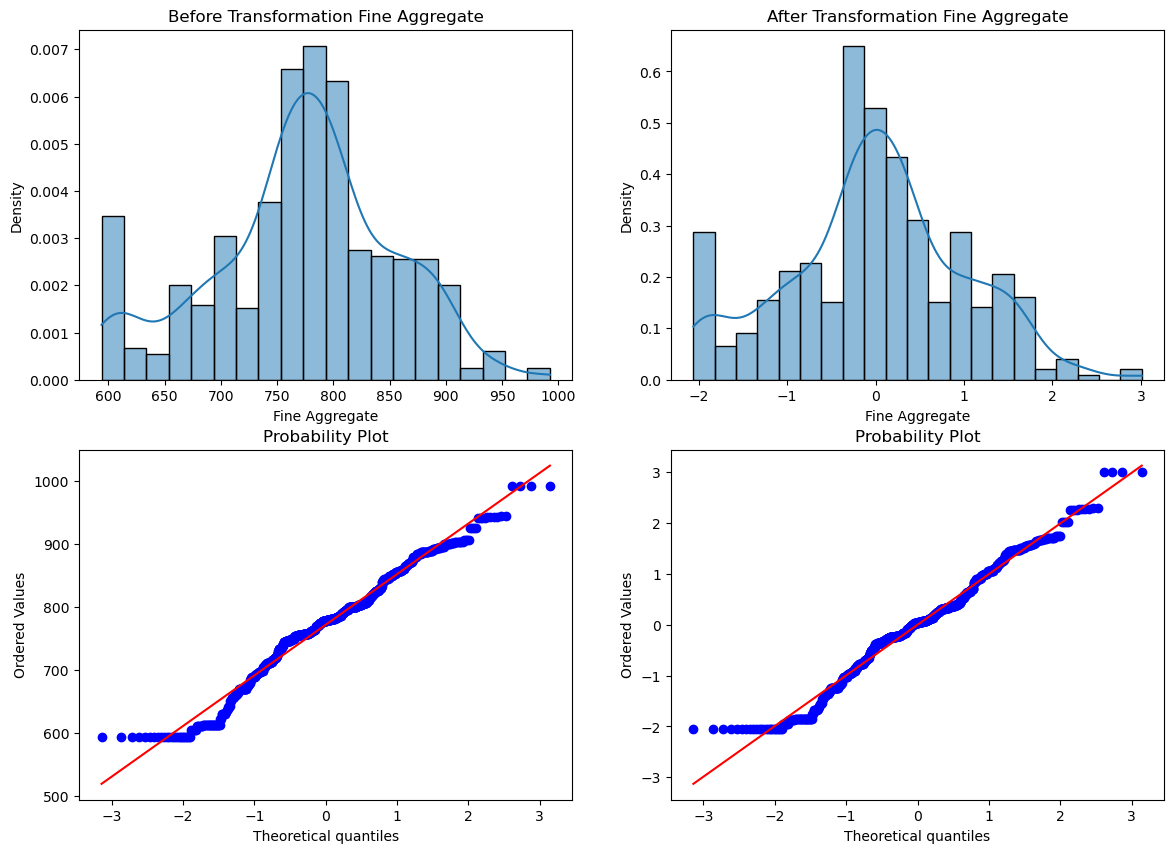

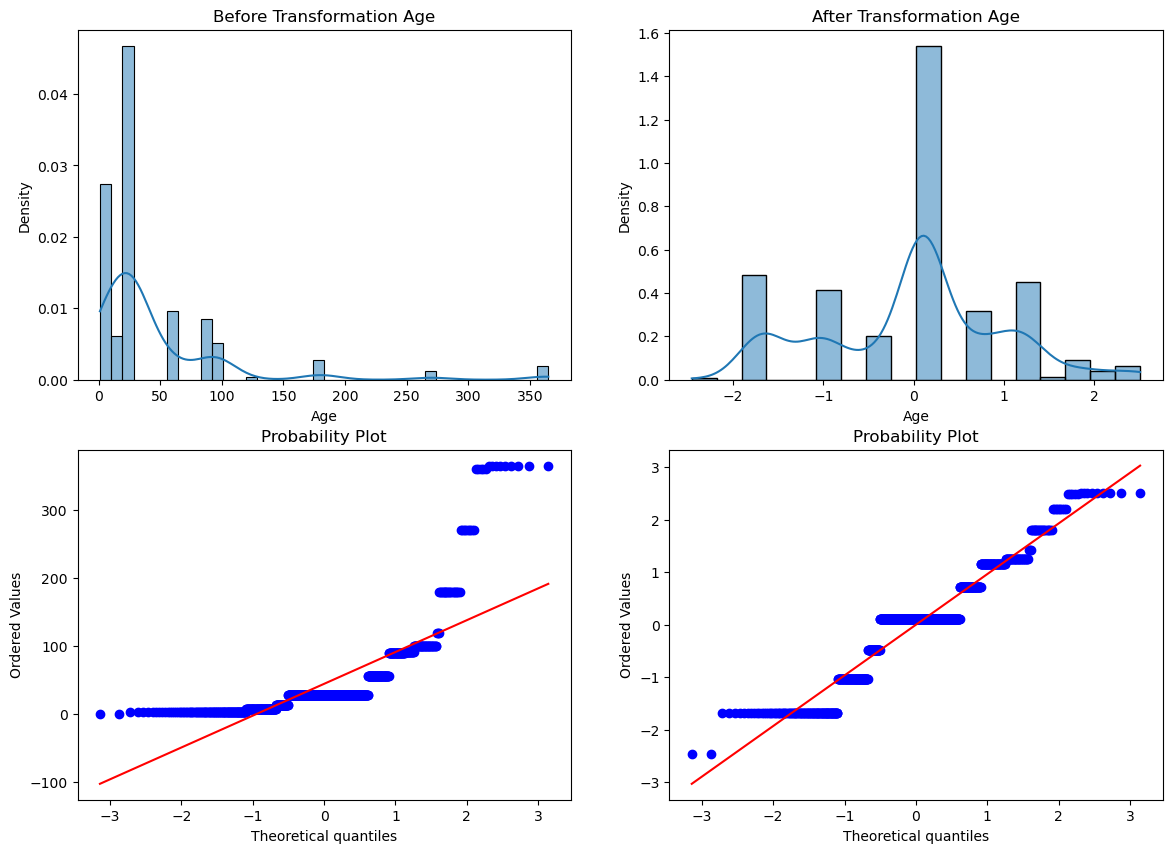

In [97]:
for col in x_train.columns:
    plt.figure(figsize=(14,10))

    plt.subplot(221)
    sns.histplot(x_train[col],kde=True,stat='density')
    plt.title('Before Transformation '+col)
    plt.subplot(222)
    sns.histplot(x_train_transformed[col],kde=True,stat='density')
    plt.title('After Transformation '+col)

    plt.subplot(223)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.subplot(224)
    stats.probplot(x_train_transformed[col],dist='norm',plot=plt)

    plt.show()

# Applying Yeo- Johnson Trasformation

In [99]:
pt1=PowerTransformer(method='yeo-johnson')

x_train_transformed2=pt1.fit_transform(x_train)
x_test_transformed2=pt1.transform(x_test)

pd.DataFrame({
    'cols':x_train.columns,
    'Yeo-Johnson lambda':pt1.lambdas_
})


,cols,Yeo-Johnson lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


## Applying Regression

In [102]:
lr=LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred2=lr.predict(x_test_transformed2)
r2_score(y_pred2,y_test)


0.779768695327321

## Cross Value Score

In [105]:
lr=LinearRegression()
pt=PowerTransformer(method='yeo-johnson')

x_transformed2=pt.fit_transform(x)
print(np.mean(cross_val_score(lr,x_transformed2,y,cv=10,scoring='r2')))

0.6586548624046109


## Plotting

In [107]:
x_train_transformed2=pd.DataFrame(x_train_transformed2,columns=x_train.columns)

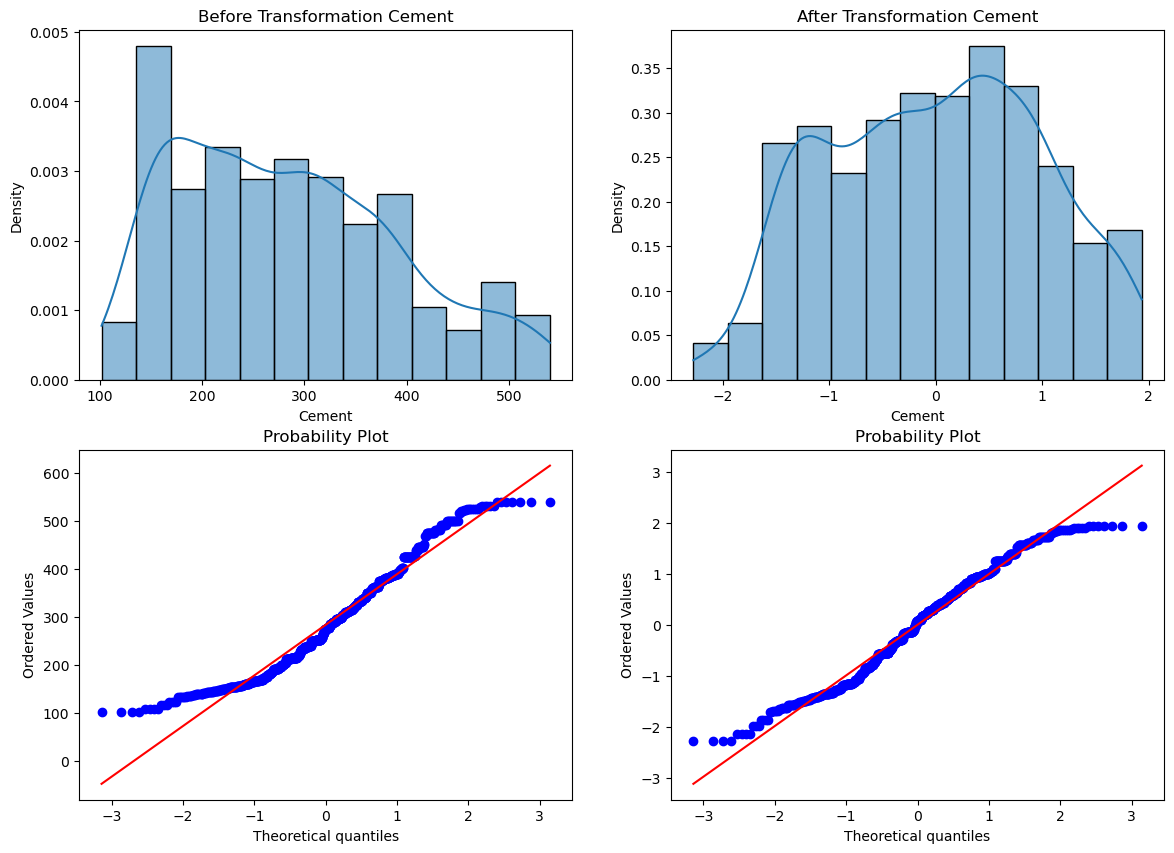

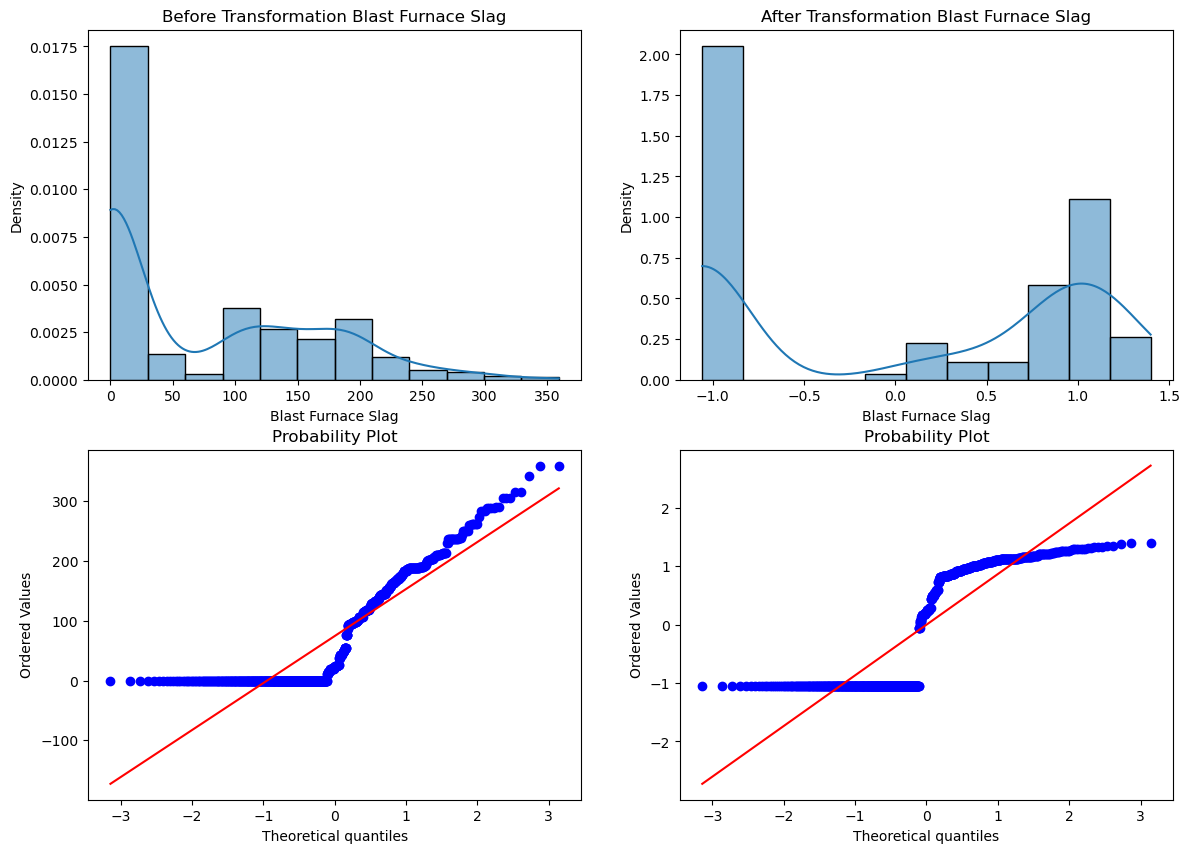

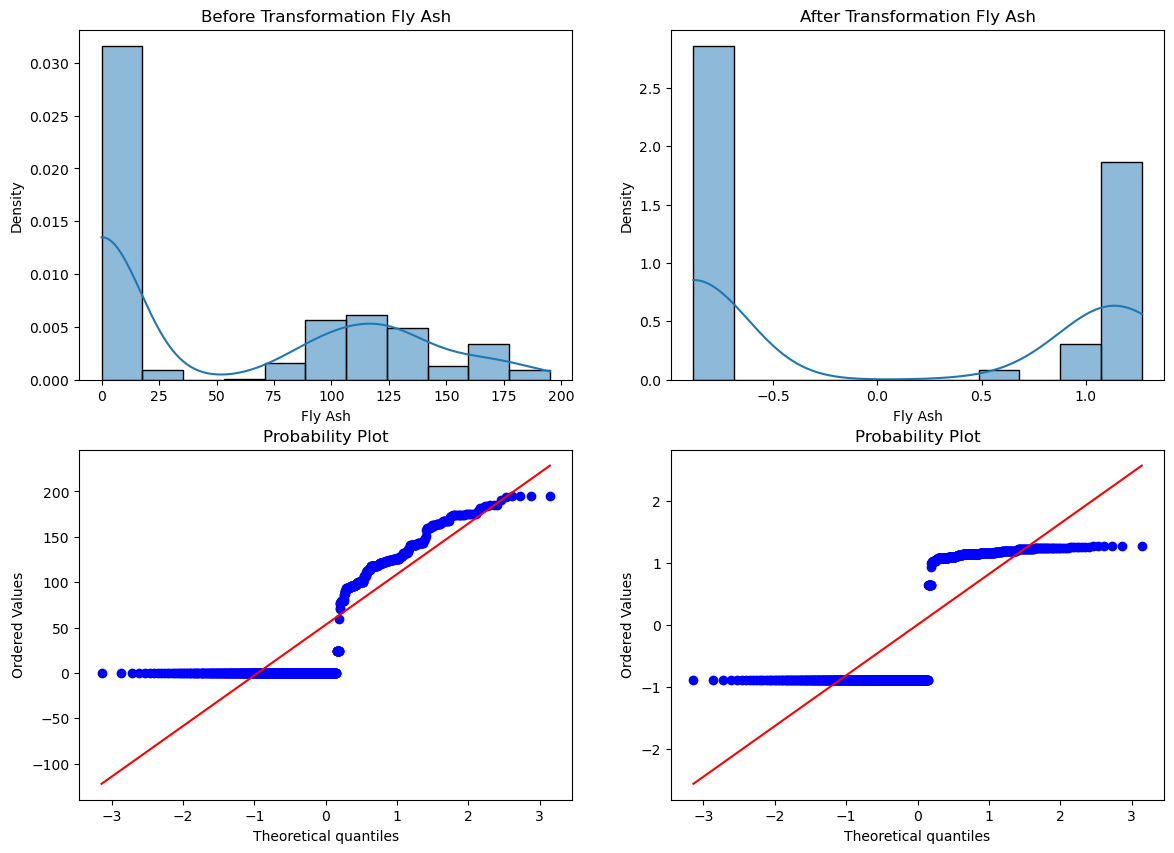

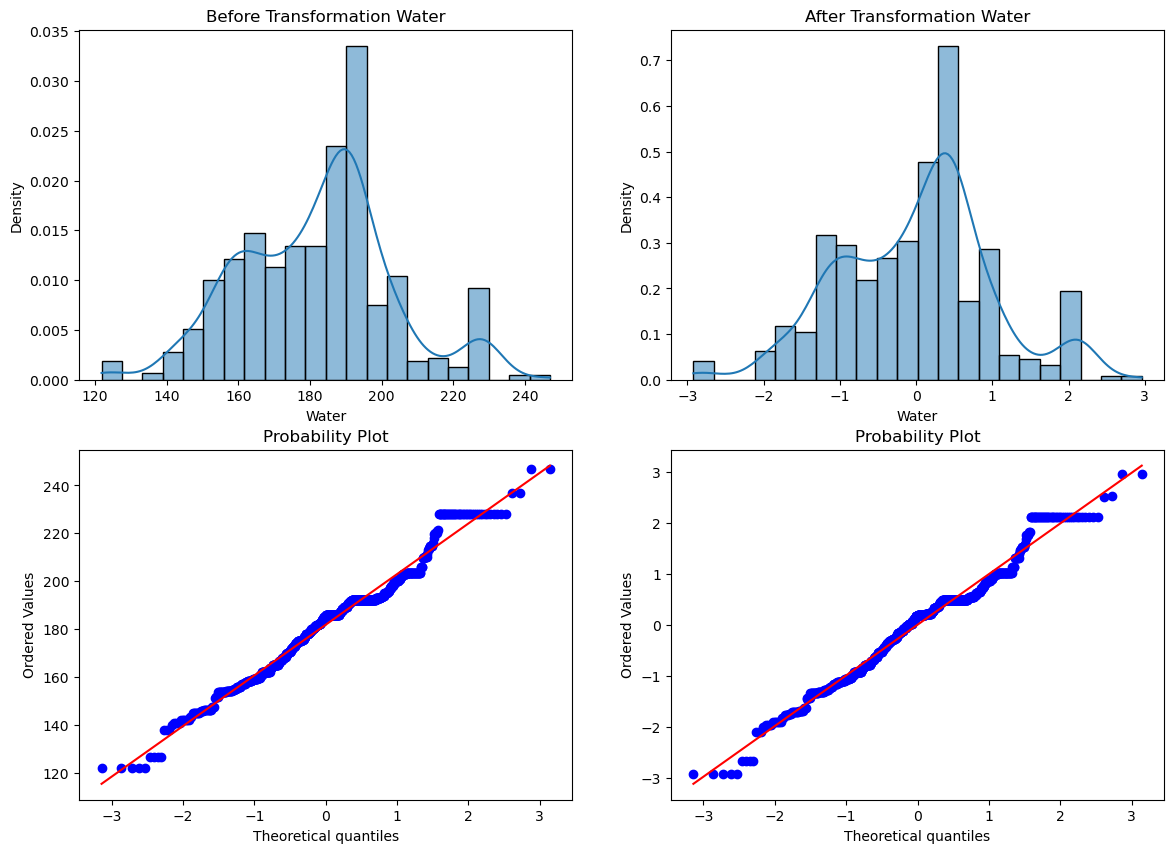

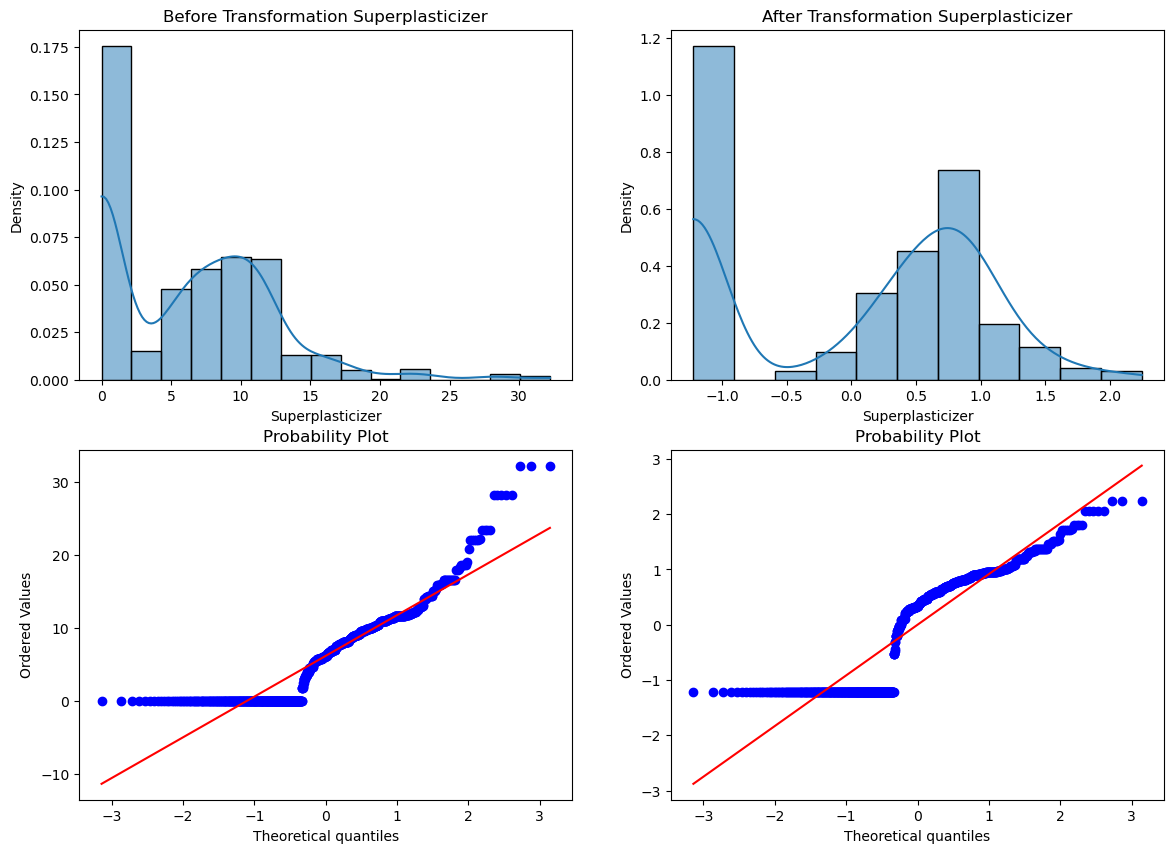

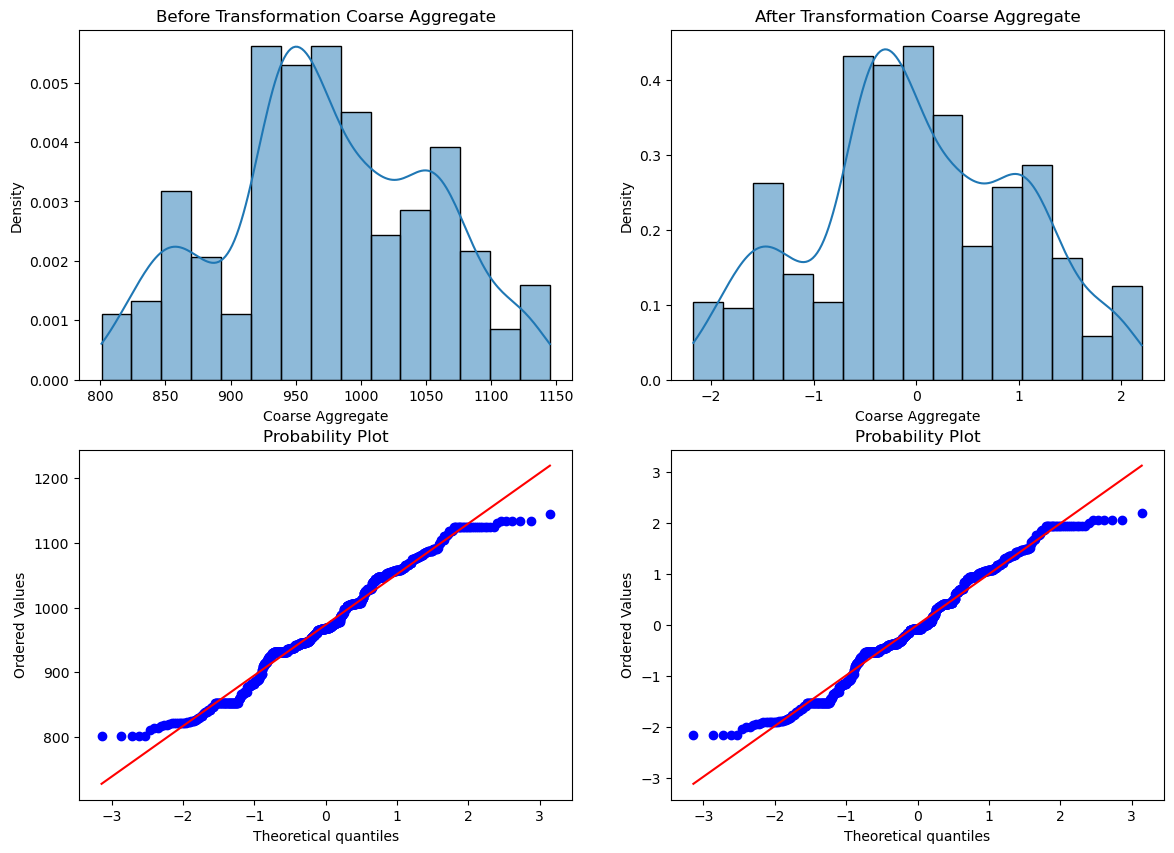

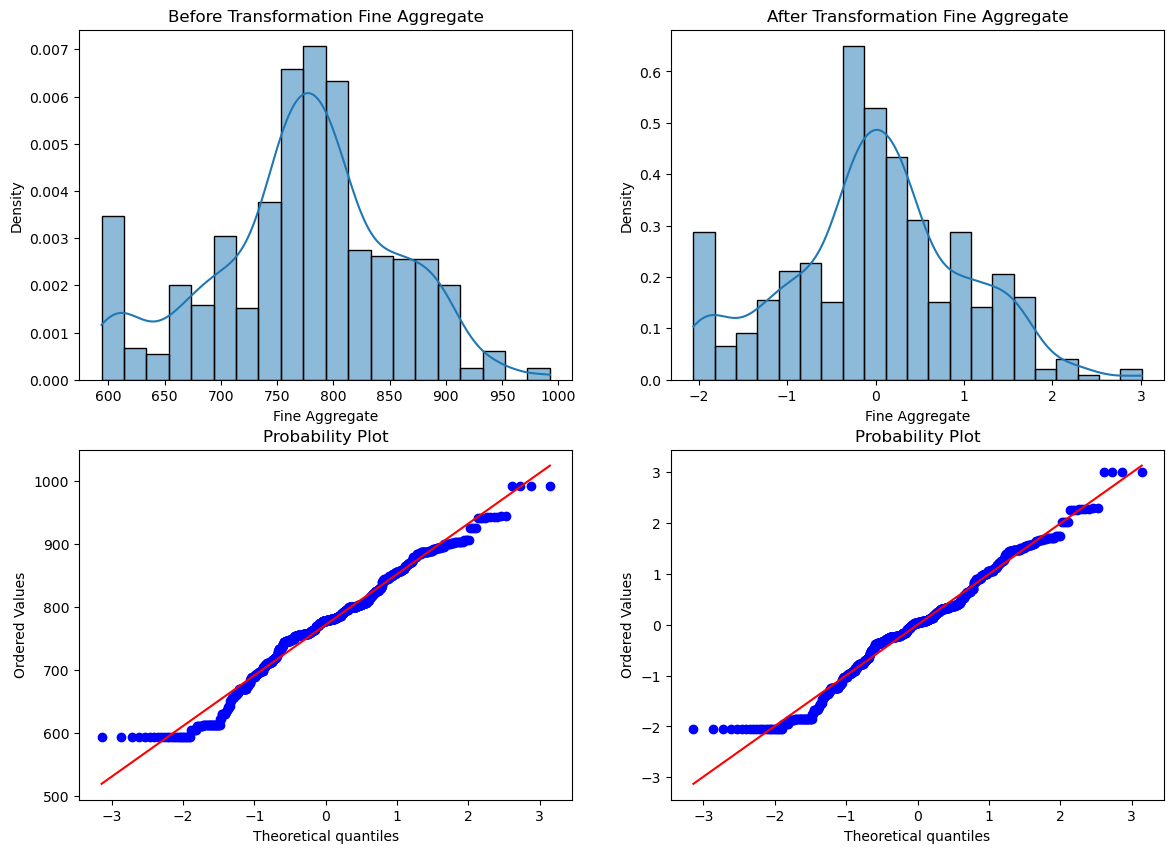

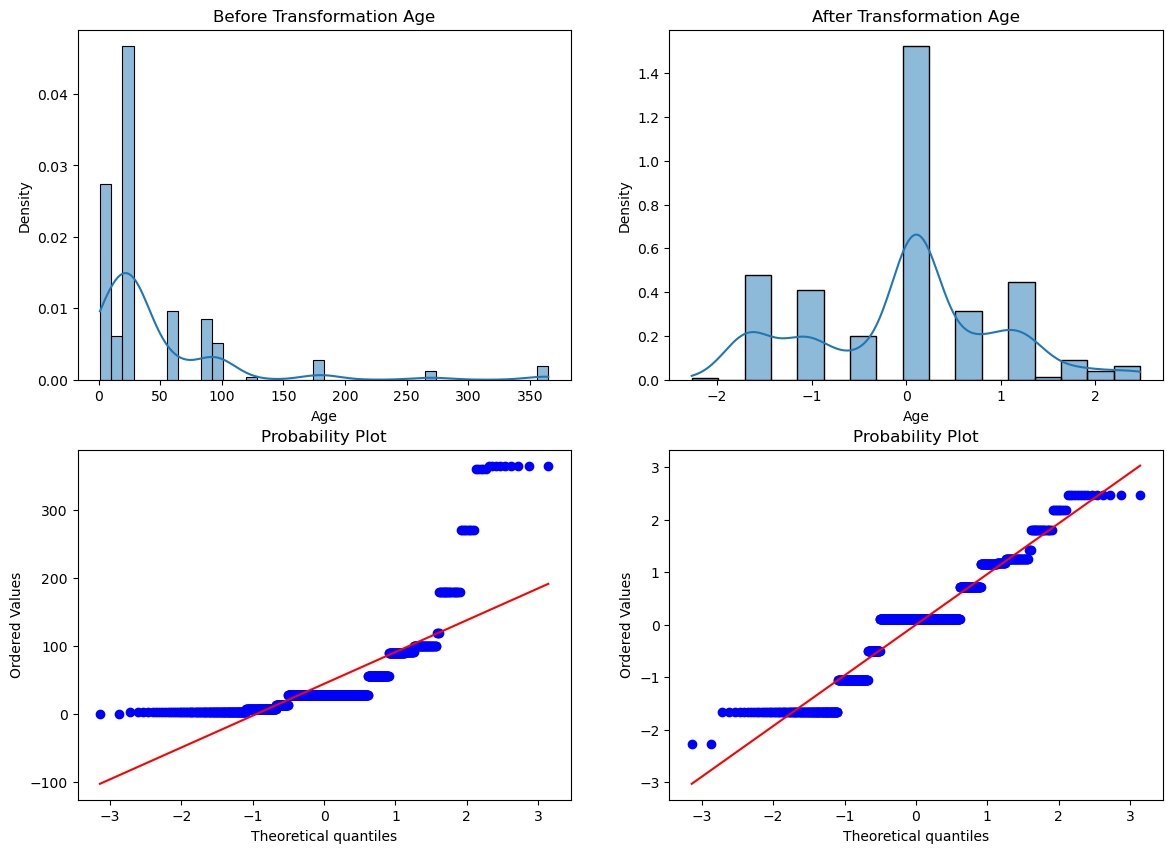

In [108]:
for col in x_train.columns:
    plt.figure(figsize=(14,10))

    plt.subplot(221)
    sns.histplot(x_train[col],kde=True,stat='density')
    plt.title('Before Transformation '+col)
    plt.subplot(222)
    sns.histplot(x_train_transformed2[col],kde=True,stat='density')
    plt.title('After Transformation '+col)

    plt.subplot(223)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.subplot(224)
    stats.probplot(x_train_transformed2[col],dist='norm',plot=plt)

    plt.show()

# Conclusion

In [110]:
pd.DataFrame({
    'cols':x_train.columns,
    'Box-Cox Lambda':pt.lambdas_,
    'Yeo-Johnson Lambda':pt1.lambdas_,
})

,cols,Box-Cox Lambda,Yeo-Johnson Lambda
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


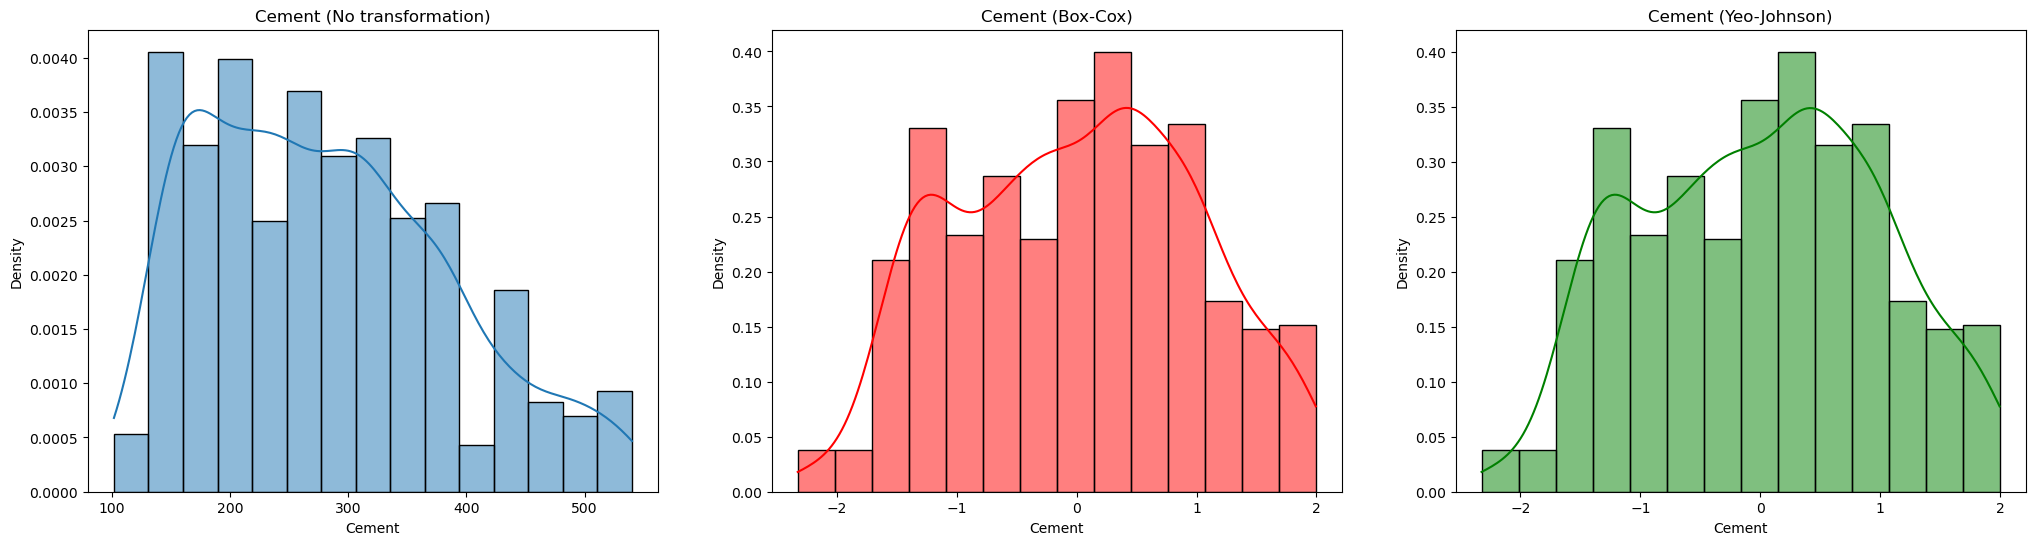

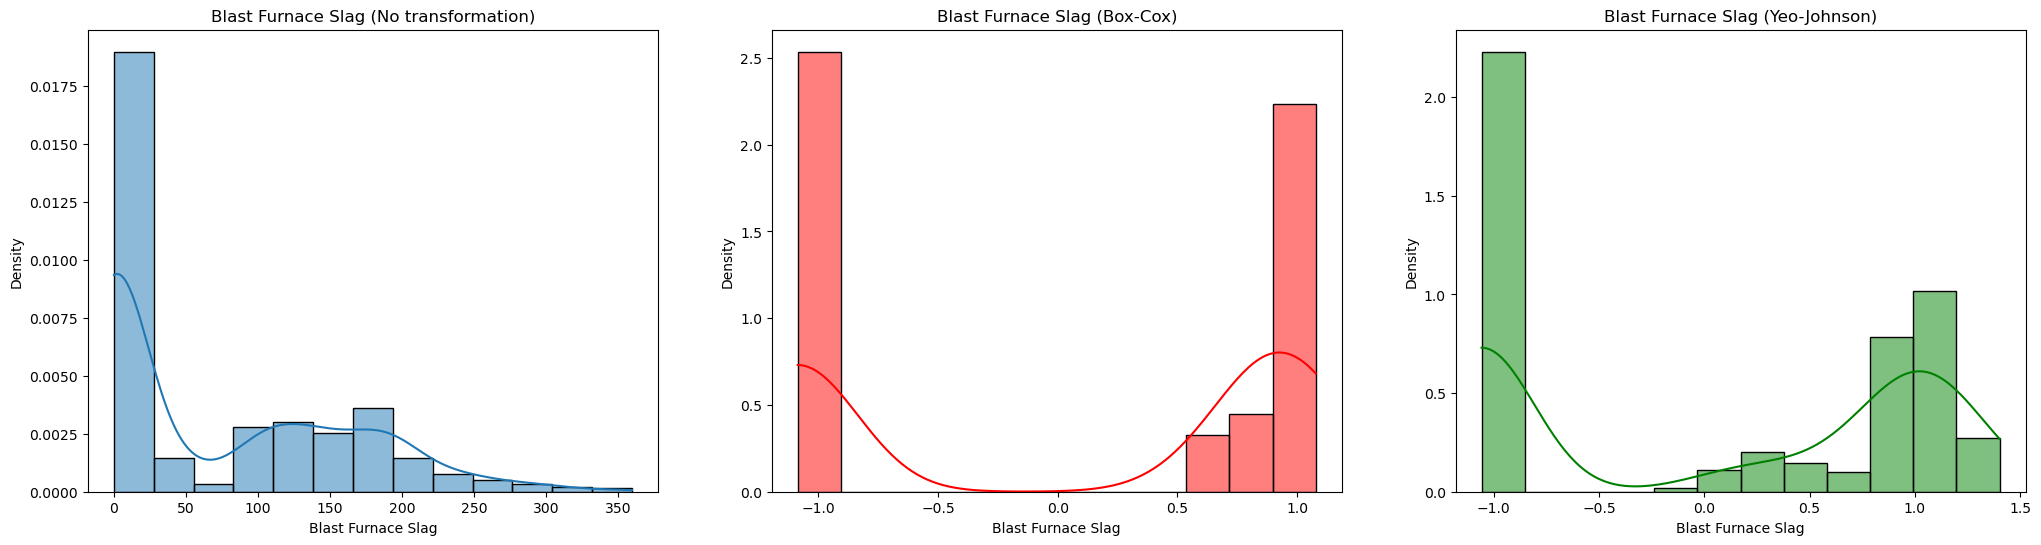

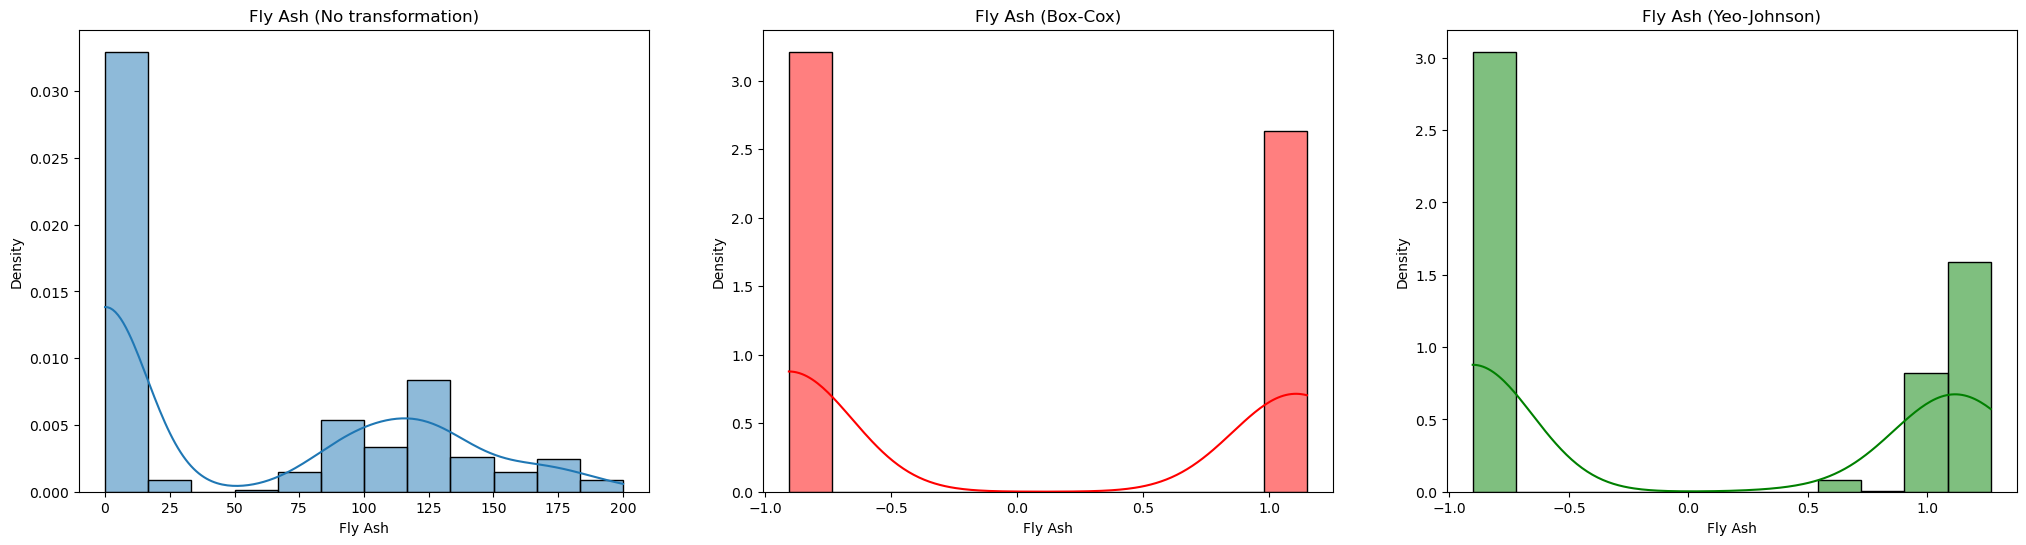

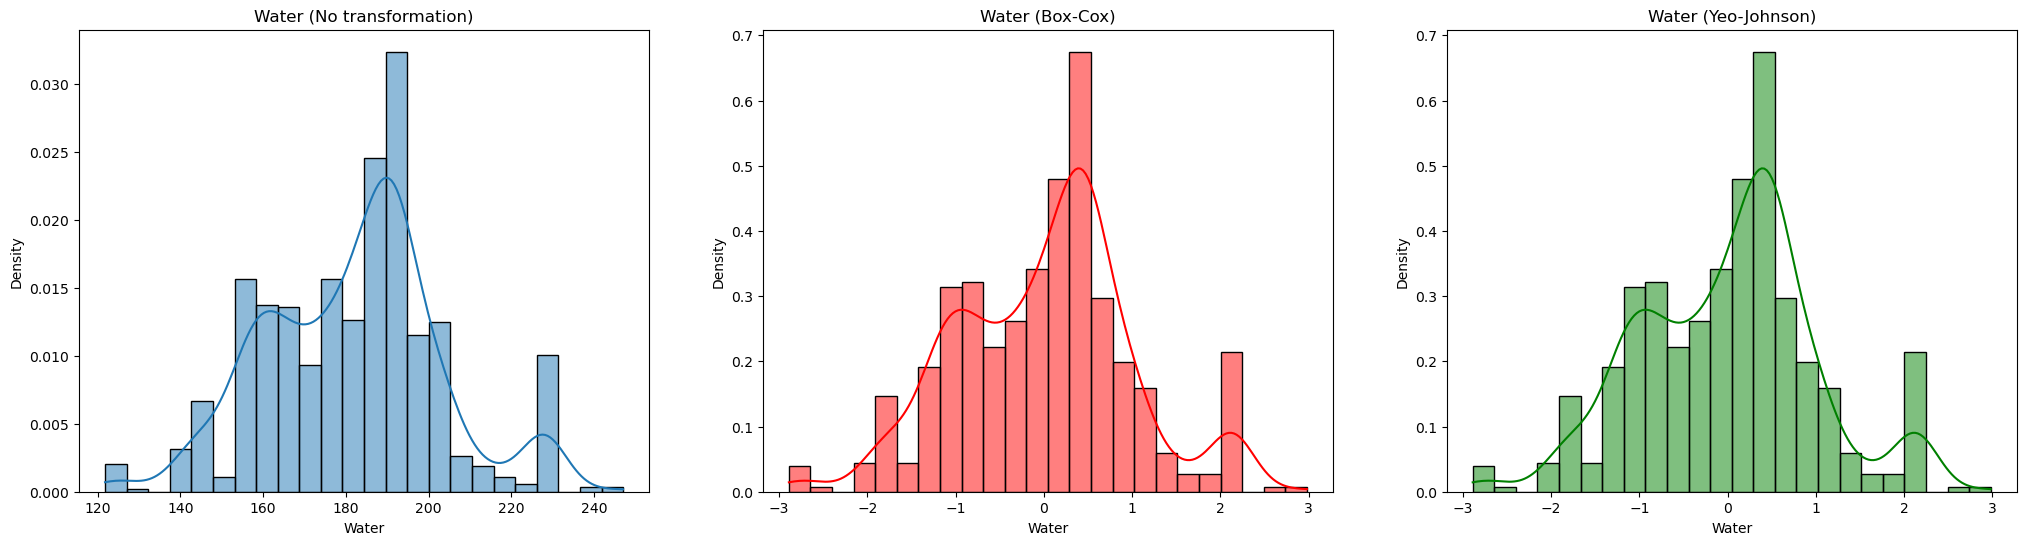

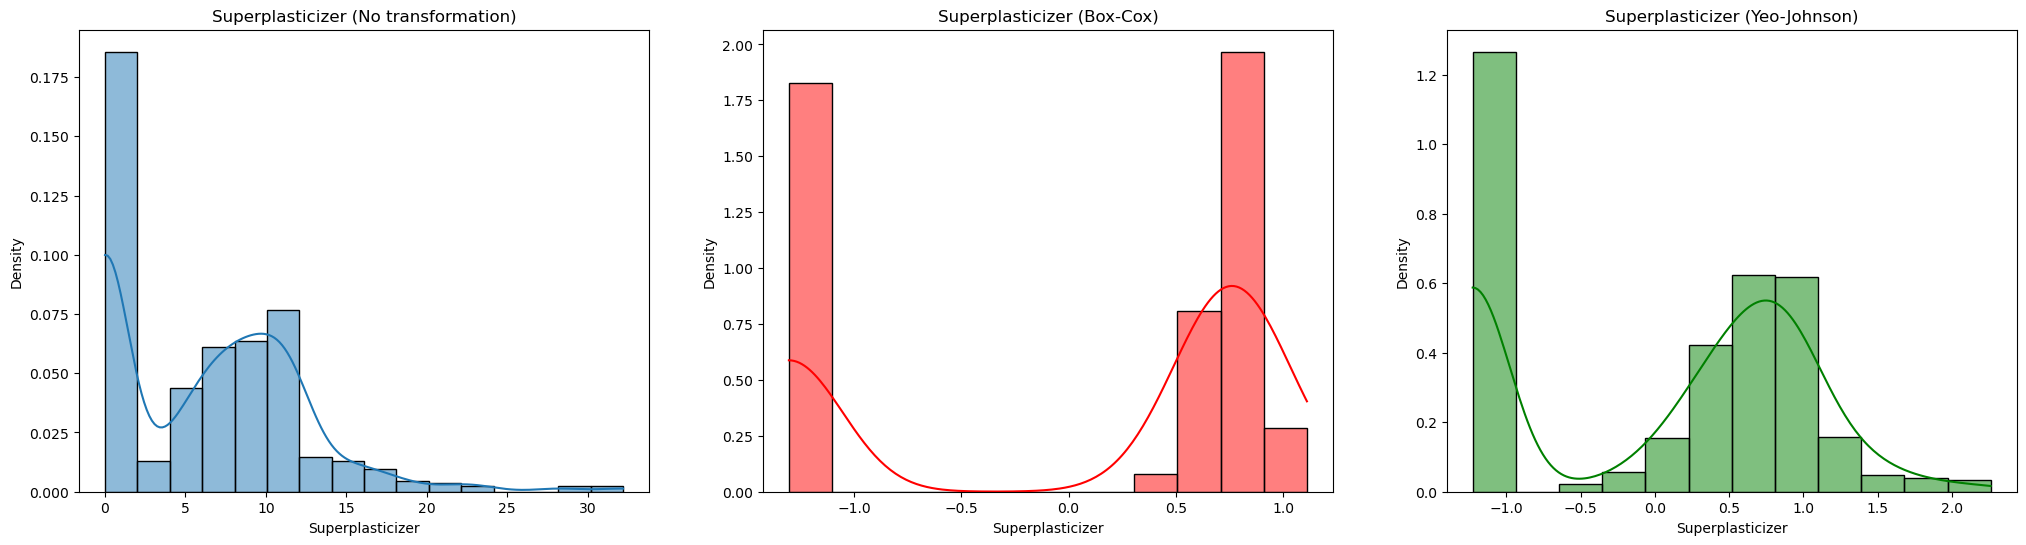

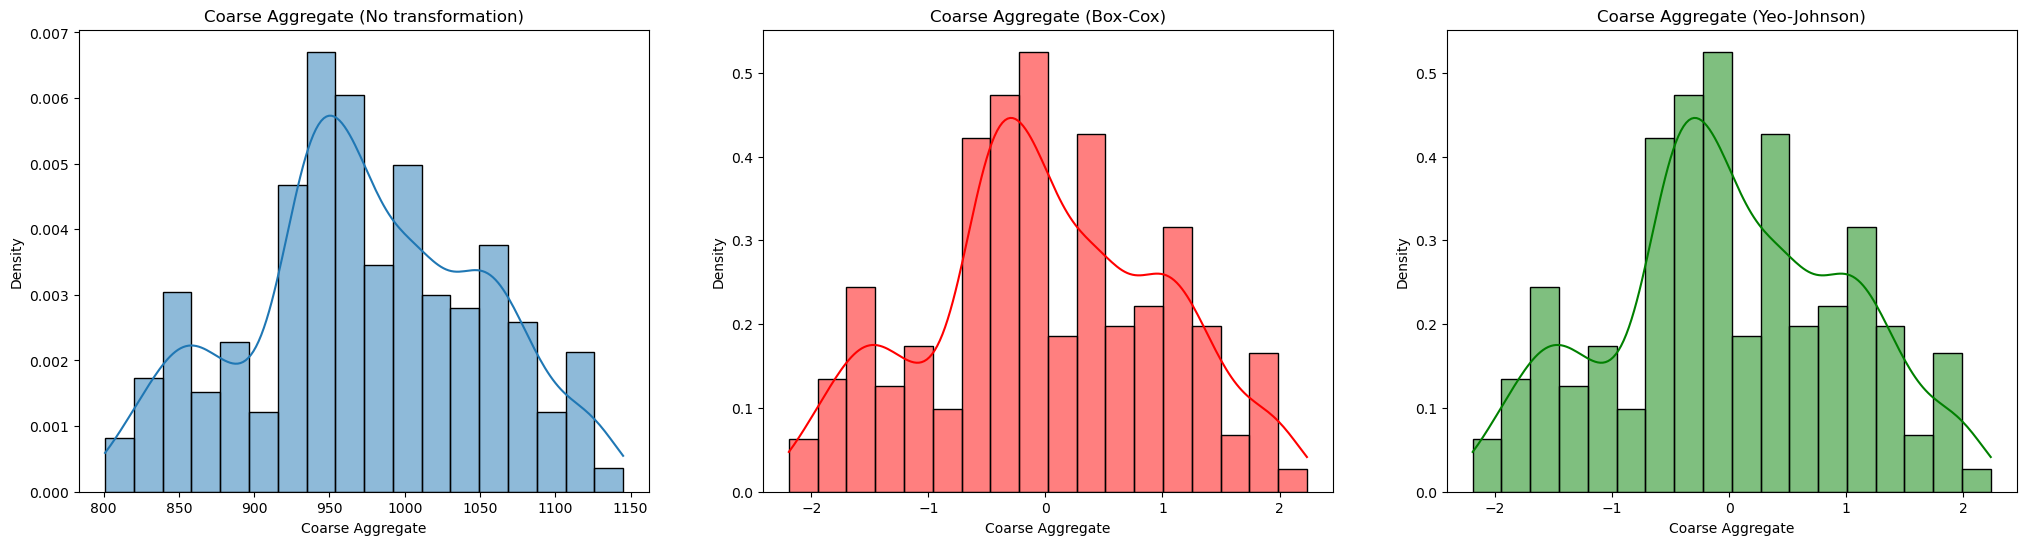

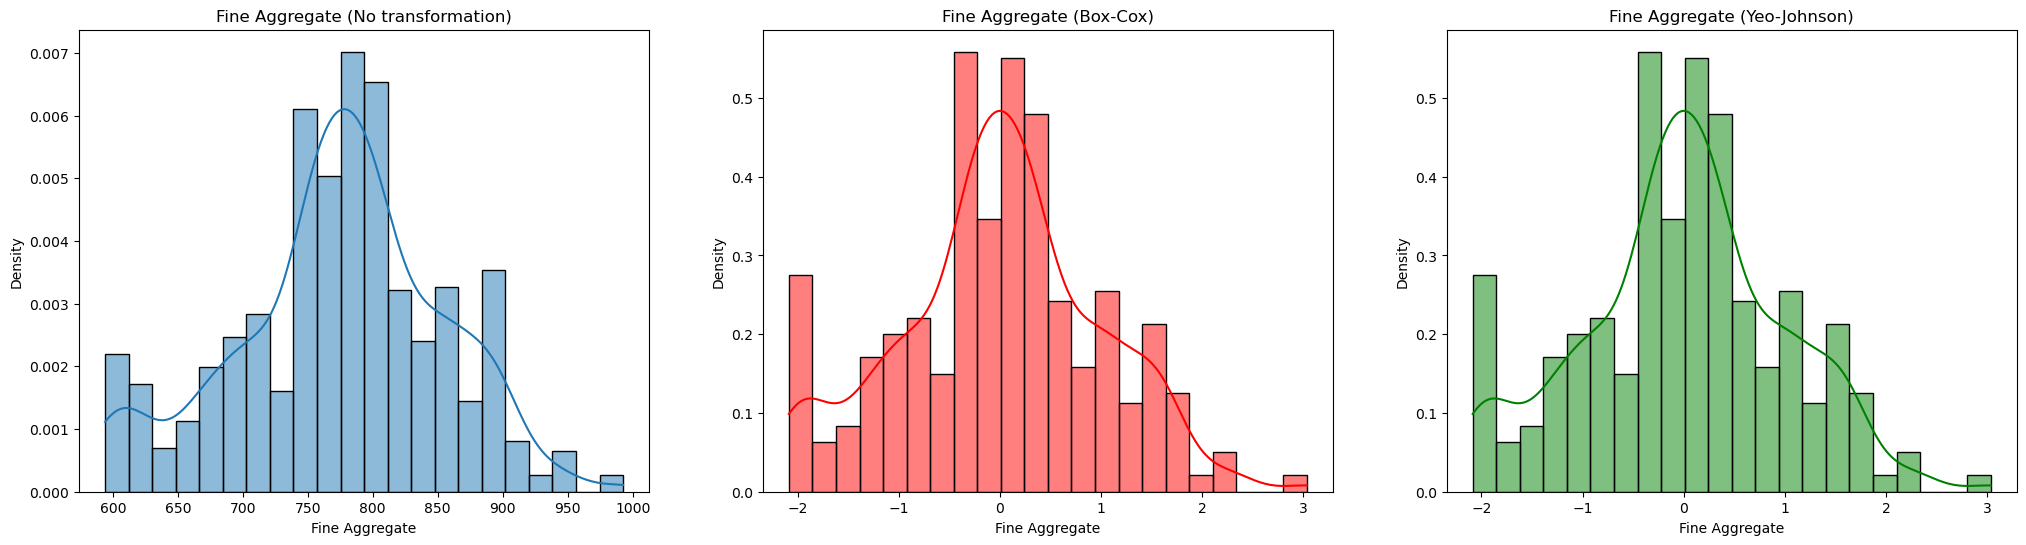

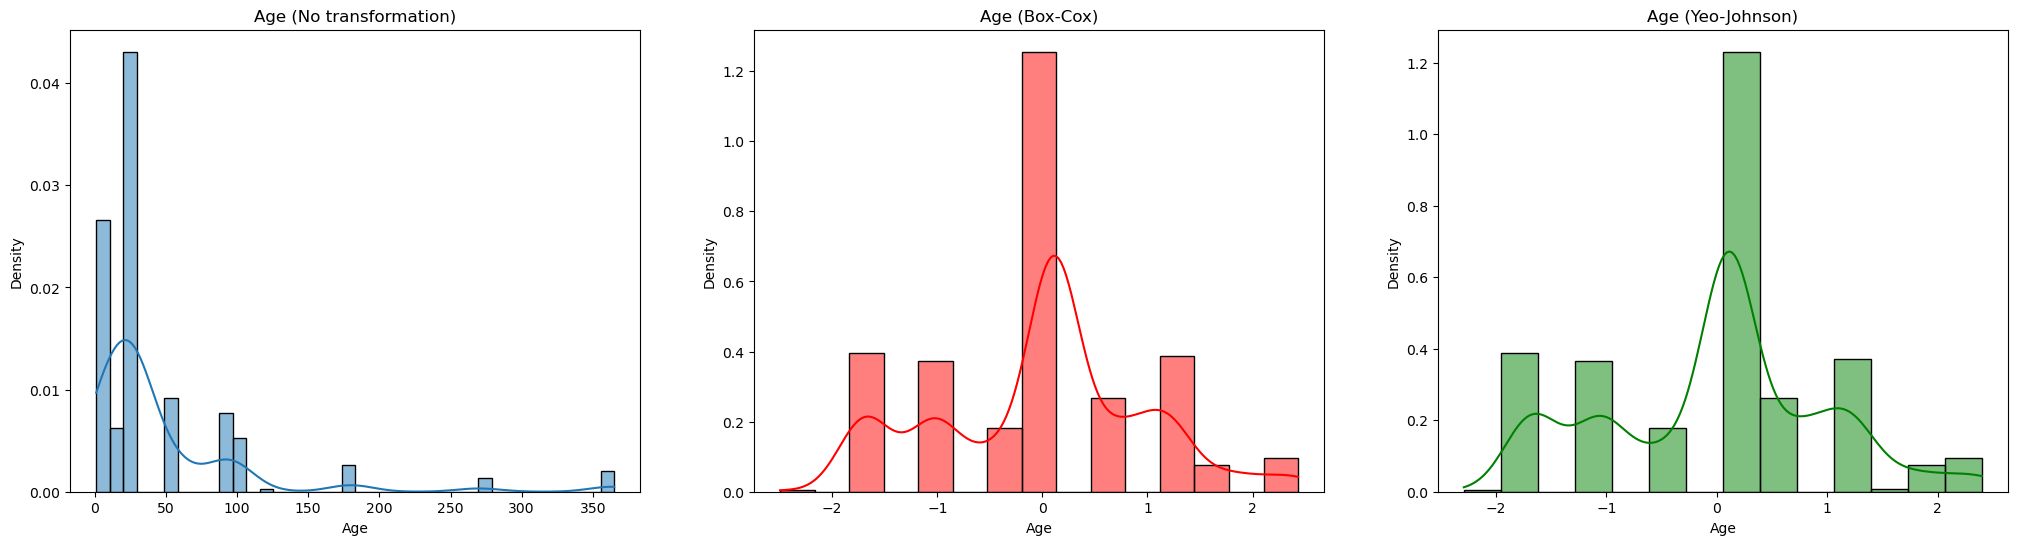

In [117]:
x_transformed1=pd.DataFrame(x_transformed1,columns=x_train.columns)
x_transformed2=pd.DataFrame(x_transformed2,columns=x_train.columns)
for col in x_train.columns:
    plt.figure(figsize=(25,6))

    plt.subplot(131)
    sns.histplot(x[col],kde=True,stat='density')
    plt.title(col+' (No transformation)')

    plt.subplot(132)
    sns.histplot(x_transformed1[col],kde=True,stat='density',color='red')
    plt.title(col+' (Box-Cox)')
    
    plt.subplot(133)
    sns.histplot(x_transformed2[col],kde=True,stat='density',color='green')
    plt.title(col+' (Yeo-Johnson)')